In [1]:
import twint
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.probability import FreqDist

/Users/aliciafeuling/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from spacy import displacy
from collections import Counter
import en_core_web_sm

In [6]:
import nest_asyncio
nest_asyncio.apply()
from optimus import Optimus
op = Optimus()

/Users/aliciafeuling/dsc-data-science-env/projects/Capstone-Project


In [4]:
# Configuring my twint pull
c = twint.Config()

In [73]:
# Pulling tweets using the keyword BLM minimum likes of 1000
# adding in a year parameter
c.Search = "BLM"
c.Min_likes = 1000
c.Format = "Username: {username} | Tweet: {tweet}"
c.Since = "2016-01-01 12:00:00"
c.Until = "2016-12-31 12:00:00"
c.Lang = "en"
c.Pandas = True

twint.run.Search(c)

Username: TomiLahren | Tweet: Btw..I answered the Kaepernick AND BLM questions but my responses were not aired. Oh well. I've got Facebook and "Final Thoughts" for that!
Username: DanielleMuscato | Tweet: #BlackLivesMatter doesn't mean only BLM. Doesn't mean BLM "more." Doesn't mean others don't. It just means they matter. Why is this so hard?
Username: OhNoSheTwitnt | Tweet: Tomi Lahren: BLM is the new KKK.  Totally! Like, remember all those times BLM hanged people to death because of the color of their skin?
Username: BuzzFeed | Tweet: This teen was told not to wear her BLM t-shirt at Thanksgiving and she clapped back perfectly  http://bzfd.it/2fkFIlg  pic.twitter.com/2SbU6Dnub3
Username: ajplus | Tweet: This #BLM activist came from Ferguson to stand with #NoDAPL. pic.twitter.com/4InjAnovwM
Username: ajplus | Tweet: From Ferguson to #StandingRock, this #BLM activist shares his take on #NoDAPL. pic.twitter.com/1ozFoDFp66
Username: blackmarvelgirl | Tweet: BLM: "We're protestors." Medi

In [74]:
def available_columns():
    return twint.output.panda.Tweets_df.columns

In [75]:
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

In [76]:
available_columns()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username',
       'name', 'day', 'hour', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [77]:
df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])

In [78]:
df_pd.head()

,date,username,tweet,hashtags,nlikes
0,2016-12-14 21:59:55,TomiLahren,Btw..I answered the Kaepernick AND BLM questio...,[],2118
1,2016-12-04 08:14:41,DanielleMuscato,#BlackLivesMatter doesn't mean only BLM. Doesn...,[#blacklivesmatter],5975
2,2016-12-01 03:51:46,OhNoSheTwitnt,Tomi Lahren: BLM is the new KKK.\n\nTotally! L...,[],2093
3,2016-11-26 08:01:01,BuzzFeed,This teen was told not to wear her BLM t-shirt...,[],1588
4,2016-11-23 11:43:03,ajplus,This #BLM activist came from Ferguson to stand...,"[#blm, #nodapl]",4205


In [79]:
df_pd.shape

(20, 5)

In [80]:
all_sentences = []

for word in df_pd['tweet']:
    all_sentences.append(word)

lines = list()
for line in all_sentences:
    words = line.split()
    for w in words:
        lines.append(w)
print(lines)

['Btw..I', 'answered', 'the', 'Kaepernick', 'AND', 'BLM', 'questions', 'but', 'my', 'responses', 'were', 'not', 'aired.', 'Oh', 'well.', "I've", 'got', 'Facebook', 'and', '"Final', 'Thoughts"', 'for', 'that!', '#BlackLivesMatter', "doesn't", 'mean', 'only', 'BLM.', "Doesn't", 'mean', 'BLM', '"more."', "Doesn't", 'mean', 'others', "don't.", 'It', 'just', 'means', 'they', 'matter.', 'Why', 'is', 'this', 'so', 'hard?', 'Tomi', 'Lahren:', 'BLM', 'is', 'the', 'new', 'KKK.', 'Totally!', 'Like,', 'remember', 'all', 'those', 'times', 'BLM', 'hanged', 'people', 'to', 'death', 'because', 'of', 'the', 'color', 'of', 'their', 'skin?', 'This', 'teen', 'was', 'told', 'not', 'to', 'wear', 'her', 'BLM', 't-shirt', 'at', 'Thanksgiving', 'and', 'she', 'clapped', 'back', 'perfectly', 'http://bzfd.it/2fkFIlg', 'pic.twitter.com/2SbU6Dnub3', 'This', '#BLM', 'activist', 'came', 'from', 'Ferguson', 'to', 'stand', 'with', '#NoDAPL.', 'pic.twitter.com/4InjAnovwM', 'From', 'Ferguson', 'to', '#StandingRock,', 'th

In [81]:
# Removing Punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines_2 = []

for word in lines:
    if word != '':
        lines_2.append(word)

In [82]:
# Stemming the words to their root
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines_2:
    stem.append(s_stemmer.stem(word))
stem

['btwi',
 'answer',
 'the',
 'kaepernick',
 'and',
 'blm',
 'question',
 'but',
 'my',
 'respons',
 'were',
 'not',
 'air',
 'oh',
 'well',
 'ive',
 'got',
 'facebook',
 'and',
 'final',
 'thought',
 'for',
 'that',
 'blacklivesmatt',
 'doesnt',
 'mean',
 'onli',
 'blm',
 'doesnt',
 'mean',
 'blm',
 'more',
 'doesnt',
 'mean',
 'other',
 'dont',
 'it',
 'just',
 'mean',
 'they',
 'matter',
 'whi',
 'is',
 'this',
 'so',
 'hard',
 'tomi',
 'lahren',
 'blm',
 'is',
 'the',
 'new',
 'kkk',
 'total',
 'like',
 'rememb',
 'all',
 'those',
 'time',
 'blm',
 'hang',
 'peopl',
 'to',
 'death',
 'becaus',
 'of',
 'the',
 'color',
 'of',
 'their',
 'skin',
 'this',
 'teen',
 'was',
 'told',
 'not',
 'to',
 'wear',
 'her',
 'blm',
 'tshirt',
 'at',
 'thanksgiv',
 'and',
 'she',
 'clap',
 'back',
 'perfect',
 'httpbzfdit2fkfilg',
 'pictwittercom2sbu6dnub3',
 'this',
 'blm',
 'activist',
 'came',
 'from',
 'ferguson',
 'to',
 'stand',
 'with',
 'nodapl',
 'pictwittercom4injanovwm',
 'from',
 'fergu

In [83]:
# Removing all stop words
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
stem2

['btwi',
 'answer',
 'kaepernick',
 'blm',
 'question',
 'respons',
 'air',
 'oh',
 'ive',
 'got',
 'facebook',
 'final',
 'thought',
 'blacklivesmatt',
 'doesnt',
 'mean',
 'onli',
 'blm',
 'doesnt',
 'mean',
 'blm',
 'doesnt',
 'mean',
 'dont',
 'mean',
 'matter',
 'whi',
 'hard',
 'tomi',
 'lahren',
 'blm',
 'new',
 'kkk',
 'total',
 'like',
 'rememb',
 'time',
 'blm',
 'hang',
 'peopl',
 'death',
 'becaus',
 'color',
 'skin',
 'teen',
 'told',
 'wear',
 'blm',
 'tshirt',
 'thanksgiv',
 'clap',
 'perfect',
 'httpbzfdit2fkfilg',
 'pictwittercom2sbu6dnub3',
 'blm',
 'activist',
 'came',
 'ferguson',
 'stand',
 'nodapl',
 'pictwittercom4injanovwm',
 'ferguson',
 'standingrock',
 'blm',
 'activist',
 'share',
 'nodapl',
 'pictwittercom1ozfodfp66',
 'blm',
 'protestor',
 'media',
 'thug',
 'nazi',
 'altright',
 'media',
 'got',
 'kany',
 'yall',
 'need',
 'stop',
 'talk',
 'race',
 'kim',
 'post',
 'blm',
 'essay',
 'complet',
 'w',
 'action',
 'item',
 'link',
 'script',
 'contact',
 'l

In [84]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [85]:
# Give the frequency of the words
freq = FreqDist()

for words in df:
    freq[words] +=1
freq

FreqDist({1: 166, 2: 20, 5: 2, 3: 2, 20: 1, 4: 1})

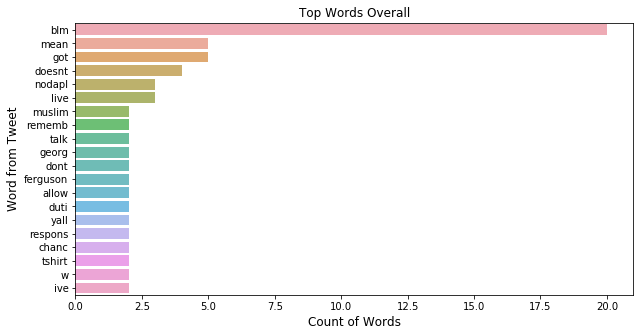

In [86]:
# Simple plot to show the top 20 words being used

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [87]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [88]:
str1 = " "
stem2 = str1.join(lines_2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

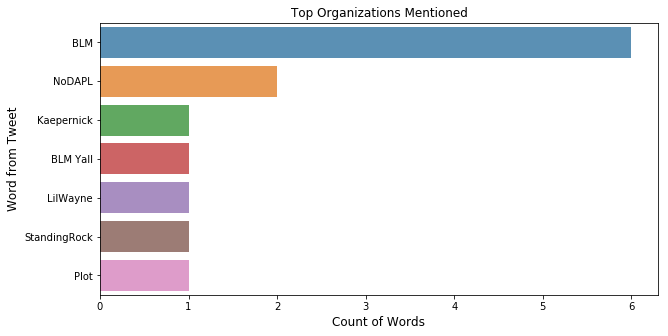

In [89]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [90]:
str1 = " " 
stem2 = str1.join(lines_2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

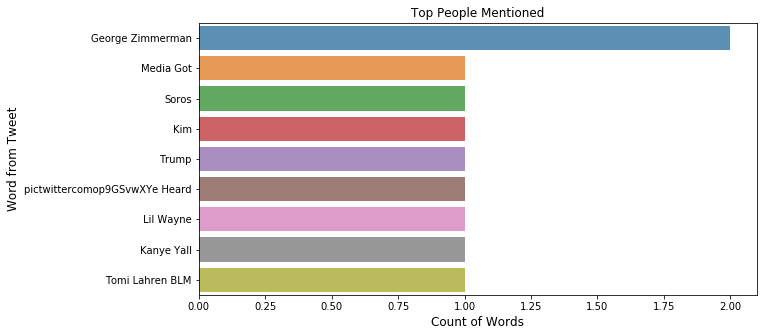

In [91]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()